In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Conta_Sonora.csv')

In [3]:
print(data.head())

        fecha  id_borough  engine_sounds  alert_signal_sounds  total_sounds  \
0  2016-05-01           1              5                    3             8   
1  2016-05-02           1              9                   14            23   
2  2016-05-03           1              4                    3             7   
3  2016-05-04           1              9                    1            10   
4  2016-05-05           1              4                    0             4   

  borough_name  
0    manhattan  
1    manhattan  
2    manhattan  
3    manhattan  
4    manhattan  


In [4]:
#Calculo descriptivas
print(data.describe())

       id_borough  engine_sounds  alert_signal_sounds  total_sounds
count  434.000000     434.000000           434.000000    434.000000
mean     1.947005      66.988479            65.698157    132.686636
std      1.043822      70.138842            68.999472    136.646164
min      1.000000       0.000000             0.000000      0.000000
25%      1.000000       5.000000             4.000000      8.000000
50%      1.000000      50.500000            49.000000     98.500000
75%      3.000000     106.750000           101.000000    211.000000
max      4.000000     413.000000           328.000000    699.000000


In [5]:
print(data.dtypes)

fecha                  object
id_borough              int64
engine_sounds           int64
alert_signal_sounds     int64
total_sounds            int64
borough_name           object
dtype: object


In [6]:
#Verifico valores nulos
print(data.isnull().sum())

fecha                  0
id_borough             0
engine_sounds          0
alert_signal_sounds    0
total_sounds           0
borough_name           0
dtype: int64


In [7]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [8]:
data = data.sort_values('fecha')

In [13]:
data['año'] = data['fecha'].dt.year
data_grouped = data.groupby('año')['engine_sounds'].sum().reset_index()

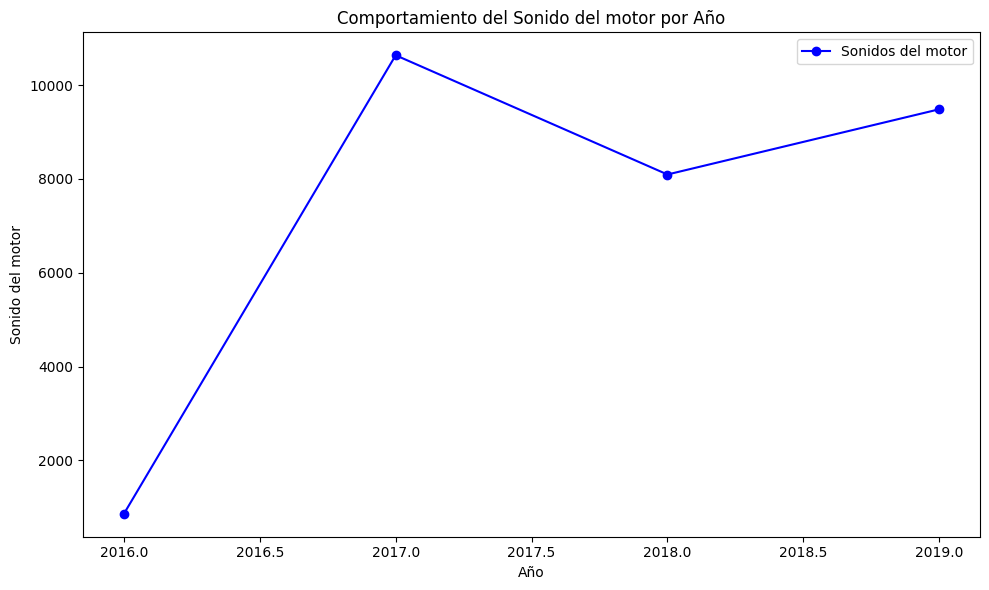

In [14]:
#Gráfico de línea del sonido del motor
#Este gráfico me muestra el comportamiento del sonido del motor. Este ha mantenido una tendencia creciente.
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['año'], data_grouped['engine_sounds'], marker='o', linestyle='-', color='b', label='Sonidos del motor')
plt.title('Comportamiento del Sonido del motor por Año')
plt.xlabel('Año')
plt.ylabel('Sonido del motor')
plt.legend()
plt.tight_layout()
plt.show()

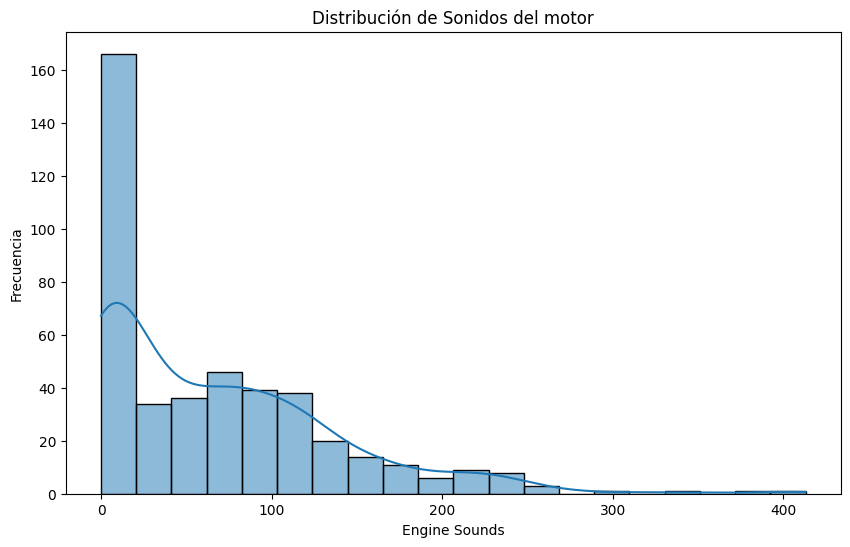

In [17]:
# Histograma de Engine Sounds
#En este gráfico se puede observar como se distribuye el sonido del motor. Tienen mayor frecuencia los que producen menor sonido.
plt.figure(figsize=(10, 6))
sns.histplot(data['engine_sounds'], bins=20, kde=True)
plt.title('Distribución de Sonidos del motor')
plt.xlabel('Engine Sounds')
plt.ylabel('Frecuencia')
plt.show()

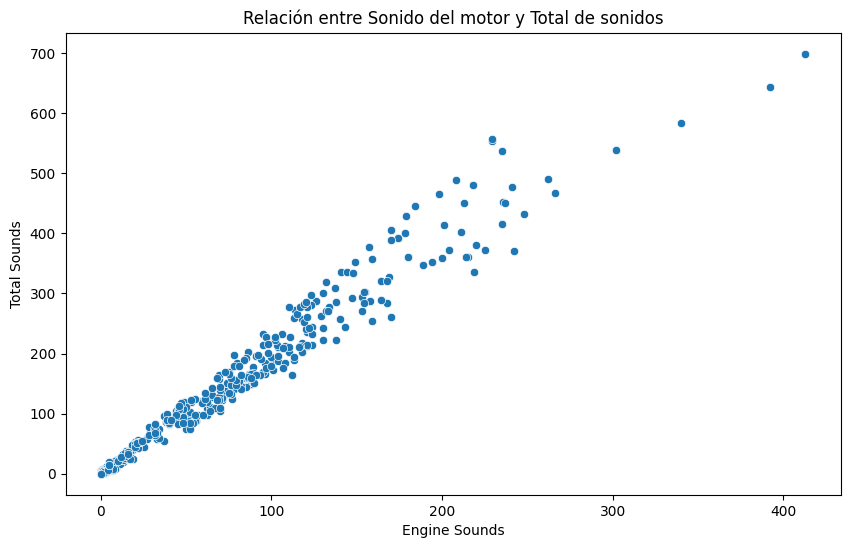

In [16]:
# Gráfico de dispersión entre Engine Sounds y Total Sounds
#Este gráfico muestra la relación marcada que existe entre los sonidos del motor y total de sonidos. 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_sounds', y='total_sounds', data=data)
plt.title('Relación entre Sonido del motor y Total de sonidos')
plt.xlabel('Engine Sounds')
plt.ylabel('Total Sounds')
plt.show()

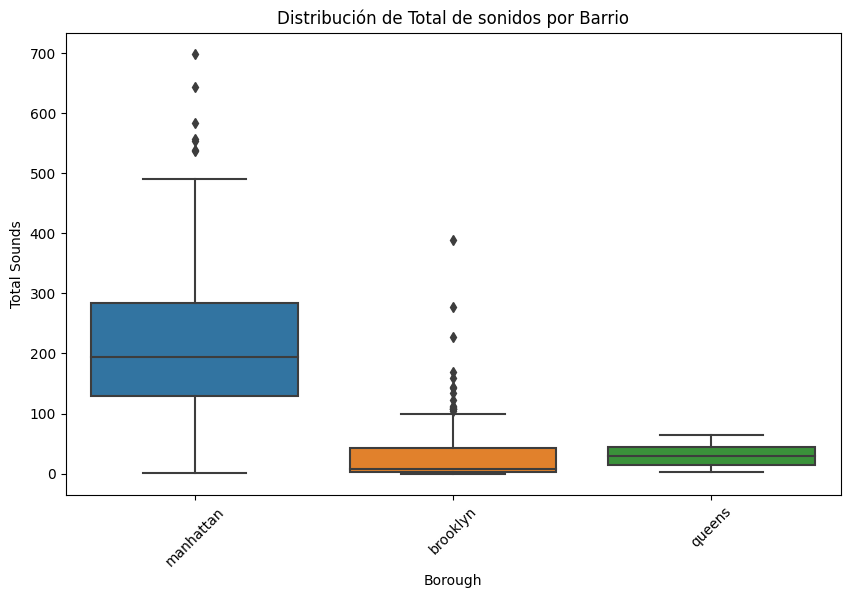

In [18]:
# Boxplot por Borough
#Este gráfico nos muestra la distribución del total de sonidos por barrio y los outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(x='borough_name', y='total_sounds', data=data)
plt.title('Distribución de Total de sonidos por Barrio')
plt.xlabel('Borough')
plt.ylabel('Total Sounds')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lic.Balzarelli\AppData\Local\Temp\ipykernel_2288\283959271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


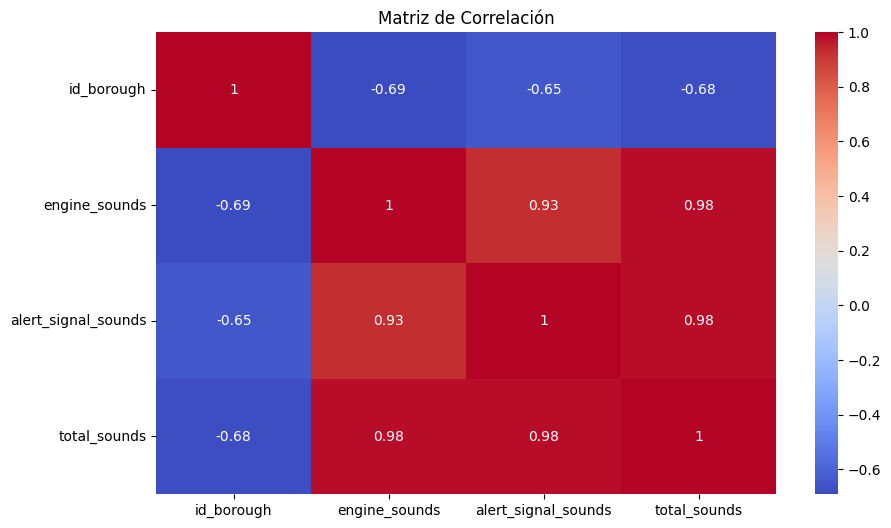

In [11]:
# Correlación entre Sonidos de motor, total de sonidos y bocinas
#En esta matriz de correlación se observa la relación marcada que existe entre el sonido del motor, las bocinas y el total de sonidos.
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

C:\Users\Lic.Balzarelli\AppData\Local\Temp\ipykernel_2288\1443957839.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data.groupby('fecha').sum()


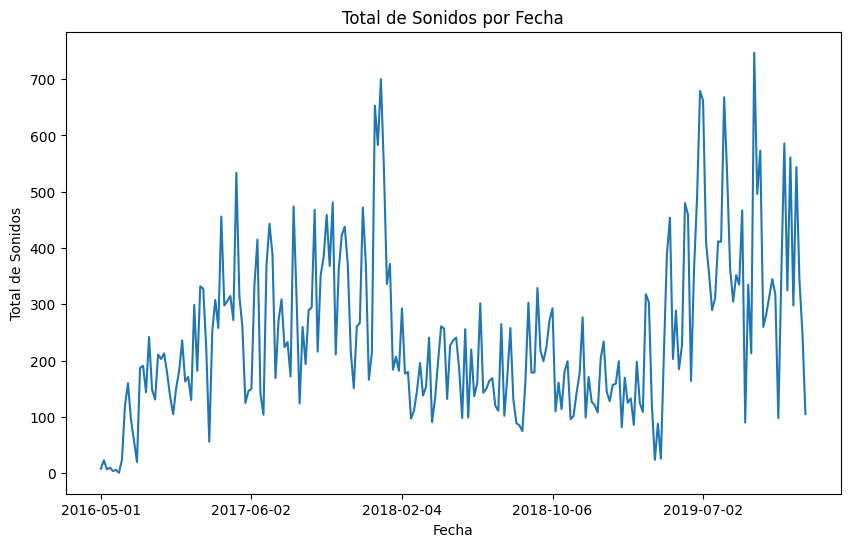

In [12]:
# Agrupación y suma por fecha
#Es esta gráfica se puede observar el total de sonidos agrupados por fecha. Se observa un incremento hacia el primer periodo del 2019.
data_grouped = data.groupby('fecha').sum()
plt.figure(figsize=(10, 6))
data_grouped['total_sounds'].plot()
plt.title('Total de Sonidos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Total de Sonidos')
plt.show()

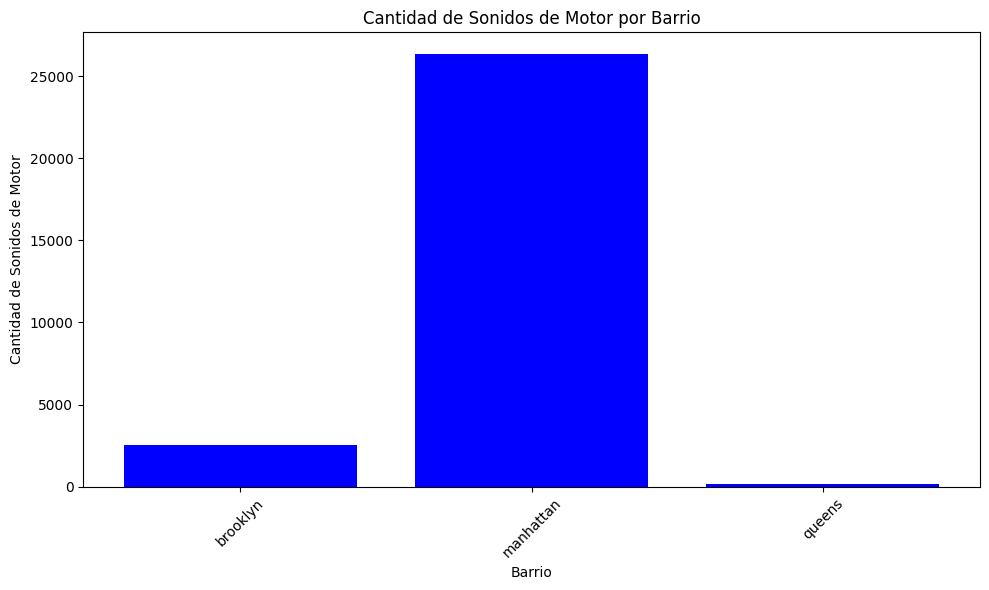

In [15]:
#Grafico de barras de la cantidad de sonidos de motor por barrio
#En este gráfico se observa que la mayor cantidad de sonidos de motor se producen en Manhattan
data_grouped = data.groupby('borough_name')['engine_sounds'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data_grouped['borough_name'], data_grouped['engine_sounds'], color='b')
plt.title('Cantidad de Sonidos de Motor por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Sonidos de Motor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()